# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 2</p>
## <p style="text-align: center;">Total points: **60**</p>
## <p style="text-align: center;">Due: Monday, **Sep 27** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 


**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Casey Copeland

EID: cmc6793

Name:

EID:

# Question 1: Bias-Variance (5 pts)

a) (**2 pts**) Assume there is a data generator $Y=f(X)+\epsilon$, which is generating Data(X, Y), where $\epsilon$ is the added random gaussian noise. We are trying to fit a curve to the samples generated from the data generator, using an estimator. The estimator can be represented as $g(X|\theta)$, where $\theta$ represents the parameters. For any test point $x_0$, what does the following mathematical representation mean? Is this the bias or variance of the estimator? $$E[g(x_0)]-f(x_0)$$

b) (**3 pts**) Use your own words to describe why there is a tradeoff between bias and variance. 

## Answer:

a) The mathematical expression is the bias portion of the error term. The error term is made up of variance, bias, and unavoidable noise. We want to make the error term as small as possible by lowering bias and variance, thus fitting the data optimally. 

b) There is a tradeoff between bias and variance because they move in inverse directions based on the complexity of your model. When picking your model to fit the data, you should choose the suitable model type and level of complexity, that results in the lowest train & test error. You want to optimized the bias and variance tradeoff by choosing the best possible y(x) that fits the true answer h(x). A low complexity model can result in underfitting the data, having high bias and low variance. A high complexity model can result in overfitting the data, having low bias, high variance. 

# Question 2: Bias-Variance exploration (20 pts)

We want to build a model that can predict y for unknown inputs x.

(a) (**10 pts**) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. **Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train`.


(b) (**5 pts**) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (**5 pts**) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a **single** plot of the $log(MSE)$ for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them.
**You can use the following codes to load the dataset and complete the analysis**:


## Answer:

In [81]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.pyplot import figure
import operator
%matplotlib inline

data_load = np.load('./data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)


**Q2 - part (a)**

In [82]:
def plot_curves(x_train, y_train, x_test, y_test): 
    degrees = [2, 4, 7]
    figure(figsize=(14, 9), dpi=80) #increase size
    plt.scatter(x_train, y_train, s=10)
    plt.scatter(x_test, y_test, s=10)

    train_MSE = []
    test_MSE = []

    for degree in degrees:
        
        x = x_train[:, np.newaxis]
        y = y_train[:, np.newaxis]
        #x_all_n = x_all[:, np.newaxis]
        #plt.scatter(x, y, s=10)
        polynomial_features= PolynomialFeatures(degree=degree)
        x_poly = polynomial_features.fit_transform(x)

        model = LinearRegression()
        model.fit(x_poly, y)
        y_poly_pred = model.predict(x_poly)

        mse = mean_squared_error(y,y_poly_pred)
        print('Train Degree:', degree)
        print('MSE:',mse)
        train_MSE.append(mse)

        #plt.scatter(x, y, s=10)
        # sort the values of x before line plot
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
        x, y_poly_pred = zip(*sorted_zip)
        plt.plot(x, y_poly_pred, label = ('train:',degree))
        #plt.show()
        
        x2 = x_test[:, np.newaxis]
        y2 = y_test[:, np.newaxis]

        polynomial_features= PolynomialFeatures(degree=degree)
        x_poly = polynomial_features.fit_transform(x2)

        model = LinearRegression()
        model.fit(x_poly, y2)
        y_poly_pred = model.predict(x_poly)

        mse2 = mean_squared_error(y2,y_poly_pred)
        print('Test Degree:', degree)
        print('MSE:',mse2)
        print(' ')
        test_MSE.append(mse2)
        #plt.scatter(x2, y2, s=10)
        # sort the values of x before line plot
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(x2,y_poly_pred), key=sort_axis)
        x2, y_poly_pred = zip(*sorted_zip)
        plt.plot(x2, y_poly_pred, label = ('test', degree))
        
    #plt.scatter(x_all_n, y_poly_pred, s = 10)    
    plt.legend(loc='best')
    plt.axis('tight')
    plt.style.use('ggplot')
    plt.show()
    return train_MSE, test_MSE
#plt.scatter(x, y, s=10)
#plt.scatter(x2, y2, s=10)

Train Degree: 2
MSE: 247.2967979737153
Test Degree: 2
MSE: 267.380694649907
 
Train Degree: 4
MSE: 31.720018057290066
Test Degree: 4
MSE: 30.60045209266466
 
Train Degree: 7
MSE: 30.677193592109735
Test Degree: 7
MSE: 28.782974006795037
 


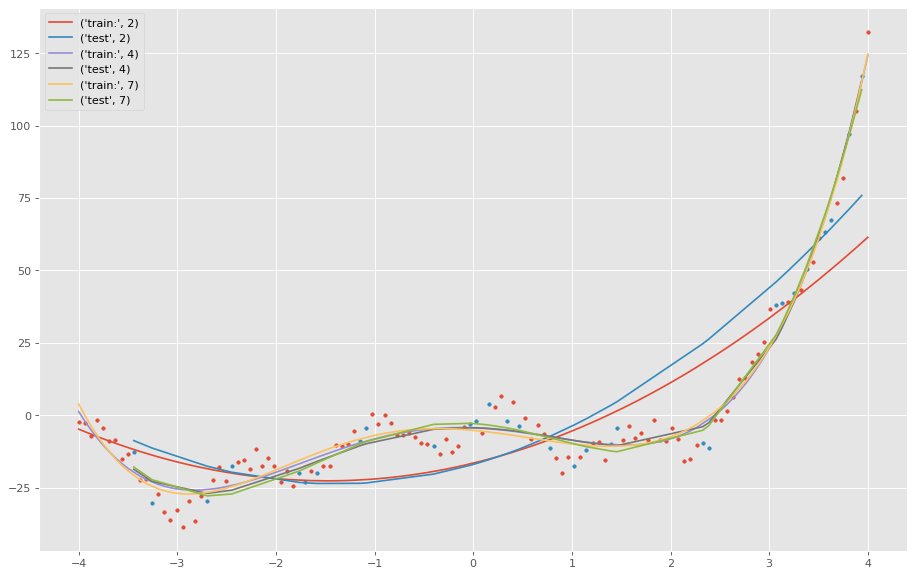

In [83]:
# Fit the different polynomials to the training data and make the plots 
#TypeError: cannot unpack non-iterable NoneType object - does not give me error when I just run the function
#plot_curves(x_train, y_train, x_test, y_test)
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

**Q2 - part (b):**
Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

The 7th degree polynomial model gives the best MSE for both the test and training data. The 2nd degree polynomial model is underfitting the data, having high bias and low variance. The MSE goes from 200+ to 30 when going from a x^2 model to a x^4 model or x^7 model. The x^4 model or x^7 model have similar test and training MSE. If you increase the polynomial degree to 30 or 40, you see the line become much more jagged and reactive to each individual point, increasing MSE, showing the model is overfititng the data, having high variance and low bias. 


**Q2 - part (c):**

20% data
 
Train Degree: 2
MSE: 161.17147378830037
Test Degree: 2
MSE: 267.380694649907
 
Train Degree: 4
MSE: 35.115113139129775
Test Degree: 4
MSE: 30.60045209266466
 
Train Degree: 7
MSE: 22.54394669137331
Test Degree: 7
MSE: 28.782974006795037
 


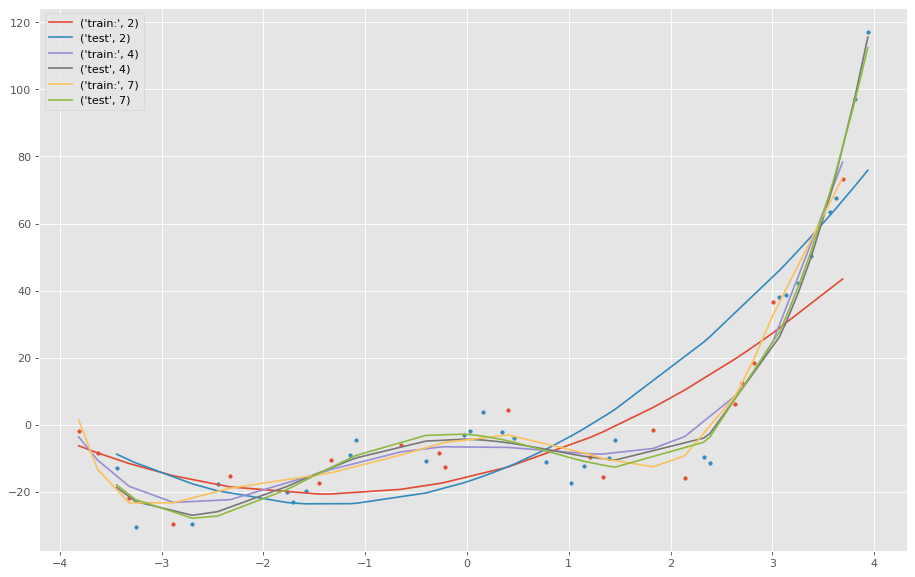

40% data
 
Train Degree: 2
MSE: 150.33251286085707
Test Degree: 2
MSE: 267.380694649907
 
Train Degree: 4
MSE: 31.62452964644691
Test Degree: 4
MSE: 30.60045209266466
 
Train Degree: 7
MSE: 25.49271875165364
Test Degree: 7
MSE: 28.782974006795037
 


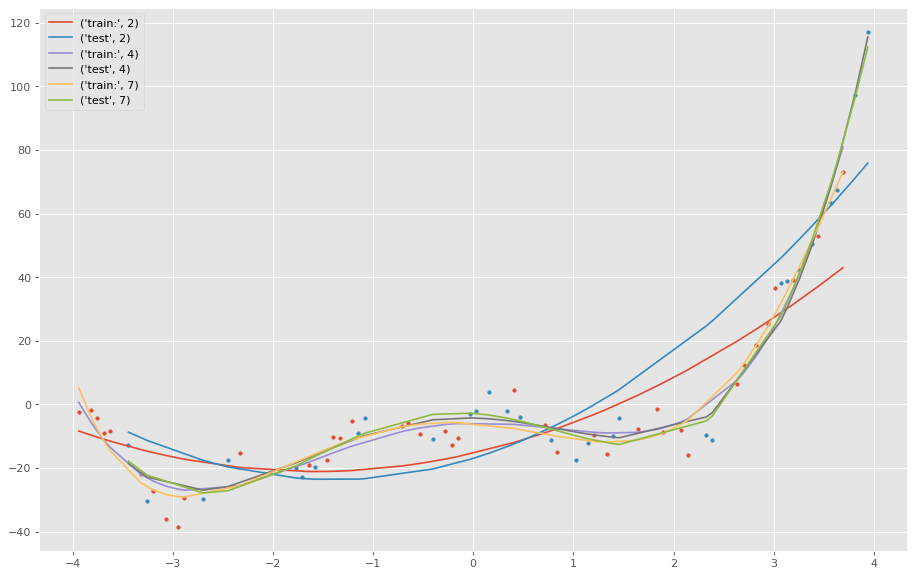

60% data
 
Train Degree: 2
MSE: 150.08383759141728
Test Degree: 2
MSE: 267.380694649907
 
Train Degree: 4
MSE: 29.192805739947897
Test Degree: 4
MSE: 30.60045209266466
 
Train Degree: 7
MSE: 26.099088642454422
Test Degree: 7
MSE: 28.782974006795037
 


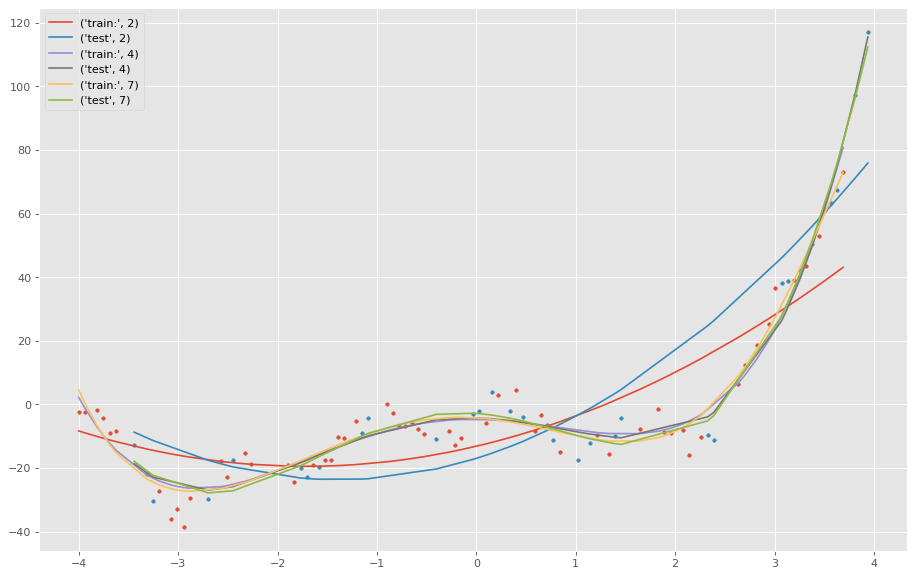

80% data
 
Train Degree: 2
MSE: 168.11882461502813
Test Degree: 2
MSE: 267.380694649907
 
Train Degree: 4
MSE: 29.305108483323444
Test Degree: 4
MSE: 30.60045209266466
 
Train Degree: 7
MSE: 26.549129596283628
Test Degree: 7
MSE: 28.782974006795037
 


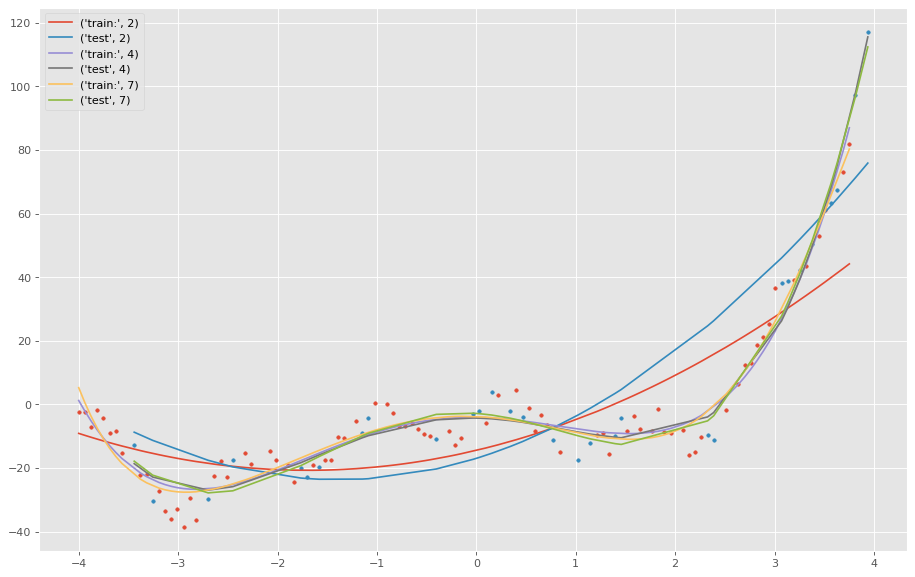

100% data
 
Train Degree: 2
MSE: 247.2967979737153
Test Degree: 2
MSE: 267.380694649907
 
Train Degree: 4
MSE: 31.720018057290066
Test Degree: 4
MSE: 30.60045209266466
 
Train Degree: 7
MSE: 30.677193592109735
Test Degree: 7
MSE: 28.782974006795037
 


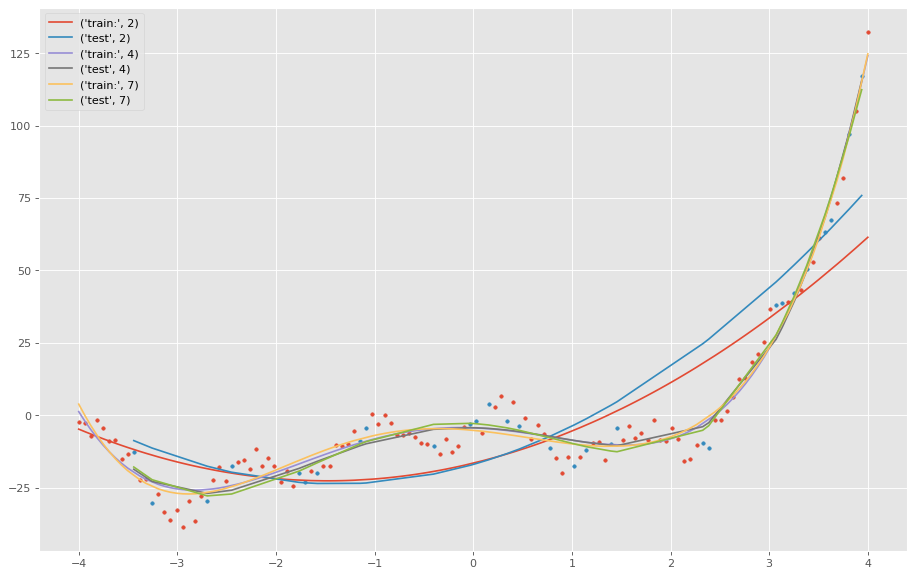

In [84]:
# Study the effects of the training data size on the bias and variance
print('20% data')
print(' ')
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
print(' ')
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
print(' ')
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
print(' ')
train_rmses_80, test_rmses_80 = train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
print(' ')
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

Make a single plot of the  𝑙𝑜𝑔(𝑀𝑆𝐸)  for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them. You can use the following codes to load the dataset and complete the analysis:

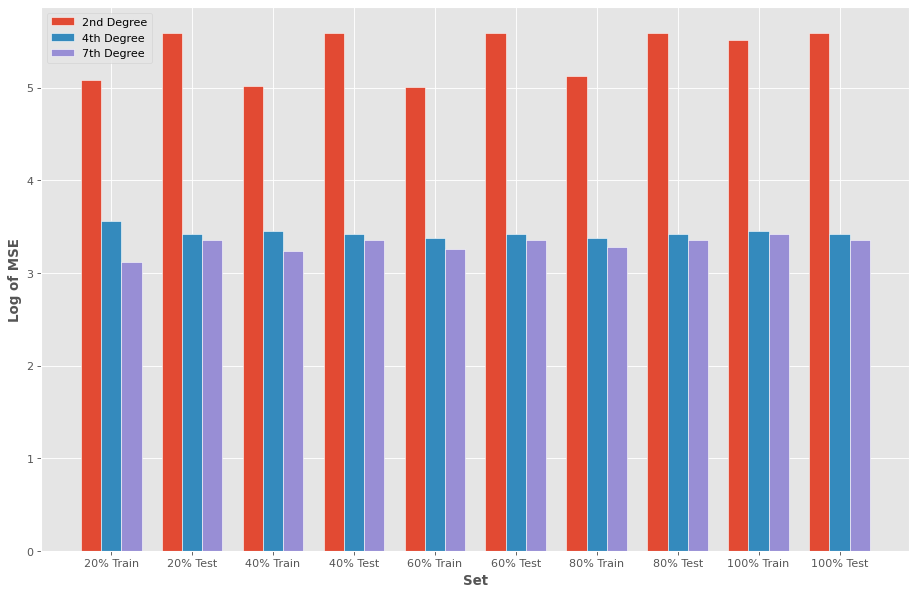

In [85]:
#Make a single plot of the  𝑙𝑜𝑔(𝑀𝑆𝐸)  for both the training and the test data vs the size of the training set 
#for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and 
#explain why you see them. You can use the following codes to load the dataset and complete the analysis:
sizes = [train_rmses_20, test_rmses_20,train_rmses_40, test_rmses_40, train_rmses_60, test_rmses_60, train_rmses_80, test_rmses_80,train_rmses_100, test_rmses_100]
barWidth = 0.25

degree2 = []
degree4 = []
degree7 = []

for i in sizes:
    degree2.append(np.log(i[0]))
    degree4.append(np.log(i[1]))
    degree7.append(np.log(i[2]))
    
b1 = np.arange(len(degree2))
b2 = [b + barWidth for b in b1]
b3 = [b + barWidth for b in b2]

figure(figsize=(14, 9), dpi=80) 

plt.bar(b1, degree2, width=barWidth, edgecolor='white', label='2nd Degree')
plt.bar(b2, degree4, width=barWidth, edgecolor='white', label='4th Degree')
plt.bar(b3, degree7, width=barWidth, edgecolor='white', label='7th Degree')

plt.xlabel('Set', fontweight='bold')
plt.ylabel('Log of MSE', fontweight = 'bold')
plt.xticks([b + barWidth for b in range(len(degree2))], ['20% Train','20% Test','40% Train','40% Test','60% Train','60% Test','80% Train','80% Test','100% Train','100% Test'])
 

plt.legend()
plt.show()



    

**State the trends you see as you change the size of the training data on each of the models and explain why you see them.**

Across the different sizes of datasets, we see the 2nd degree polynomial perform the worst, while x^4 and x^7 perform similarly, with the 7th degree performing slightly better. As the datasize increases, you see the gap between the train and test MSE becomes smaller, displaying that with more data our models are able to create a y(x) that is closer to the true h(x). 

# Question 3: Gradient descent (5 pts)

a) (**2 pts**) Compare gradient descent and stochastic gradient descent in terms of their key advantages and disdvantages. Limit your answer to one paragaraph.

b) (**3 pts**) Read this [blog](https://www.benfrederickson.com/numerical-optimization/) on second order optimization and answer the following question: **How does Nelder-Mead method work? What can be the major problems of Nelder-Mead method?**

## Answer:

a) SGD vs GD: 
In gradient descent you take the sum of the gradient terms over all training samples, while stochastic gradient descent takes gradient terms using a single training set, modifies the parameters along the way, thus reach the optimal solution more quickly and being computationally superior. With SGD you begin to make progress improving the parameters immediately. If the number of training samples is very large Gradient Descent may take too long since you must run through the entire training set in order to improve the parameter estimates. SGD on the other hand, reduces computation time, and begins to improve the estimates immediate from the first sample. SGD usually converges faster than GD, resulting in the error function sometimes not being as well minimized as when you use GD. 

b) The Nelder-Mead method works by selecting two points along a gradient and then taking  steps in the direction of the lower point. The Nelder-Mead method dynamically adjust the size of the nexts steps,larger or smaller, based on how well the previously step performed in regards to finding loss. Nelder-Mead works really well on low dimensional functions, however the method begins to fail when parameters exceed 12. Nelder-Mead is great in a two dimensional space, and becomes increasingly more difficult as dimensionality increases.

# Question 4: Stochastic gradient descent (10 pts)

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：
$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$ 

## Answer:

$$ w_0^{t+1} = w_0^{t} + 2n(w_0^{t} + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1}) $$
$$ w_1^{t+1} = w_1^{t} + 2x_1n(w_0 + w_1^{t}x_1 + w_2 x_1x_2 + w_3e^{-x_1}) $$
$$ w_2^{t+1} = w_2^{t} + 2x_1x_2n(w_0 + w_1x_1 + w_2^{t+1}x_1x_2 + w_3e^{-x_1}) $$
$$ w_3^{t+1} = w_3^{t} + 2e^{-x_1}n(w_0 + w_1x_1 + w_2x_1x_2 + w_3^{t+1}e^{-x_1}) $$


# Question 5: Stochastic gradient descent coding (20 pts)

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use your new gradient descent regression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [86]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
#from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
#uploaded = files.upload()

In [87]:
#Modified the class template here. 
class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        #Initial guesses for the weights are zeros
        #Can modify or change the array if need be.
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        #self coefficient update designed with the equations in 1 in mind.
        self.coef = self.coef - (self.learning_rate*gradient)
    
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        self.cache = np.zeros(self.coef.shape)
        self.v = np.zeros(self.coef.shape)
        self.decay_rate = 0.9
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                #array of two points.
                X_i = X[i,:]
                
                #Error = yhat-y.
                error_i = self.linearPredict(X_i) - y[i]
                
                # Compute gradients
                gradient = np.zeros(4) 
                gradient = np.array([2*error_i, #Error term already in format.
                                     2*error_i*X_i[0], #X_i[0] is x1
                                     2*error_i*X_i[0]*X_i[1], #X_i[1] is x2
                                     2*error_i*math.exp(X_i[0]) #math.exp is exponent function for e^
                ])
               
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
    #compute dot product of self.coef and X
        return X.dot(self.coef)

In [88]:
import math
#given code
data = pd.read_csv('SGD_samples-1.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]


## Answer:

**part (a) part (b)**

<ipython-input-87-9c9c124b3a2f>:38: RuntimeWarning: overflow encountered in double_scalars
  2*error_i*math.exp(X_i[0]) #math.exp is exponent function for e^
<ipython-input-87-9c9c124b3a2f>:14: RuntimeWarning: invalid value encountered in subtract
  self.coef = self.coef - (self.learning_rate*gradient)
<ipython-input-87-9c9c124b3a2f>:14: RuntimeWarning: overflow encountered in multiply
  self.coef = self.coef - (self.learning_rate*gradient)


The first best Learning Rate & Regularization are (0.0001, 0)
The second best Learning Rate & Regularization are (0.0001, 10)
Their MSE scores are [0.035464965659974396, 0.035464965659974396]


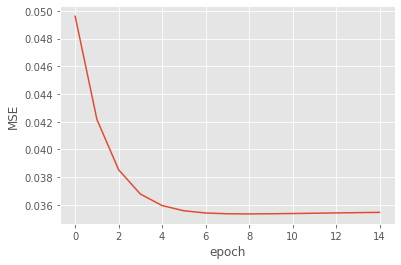

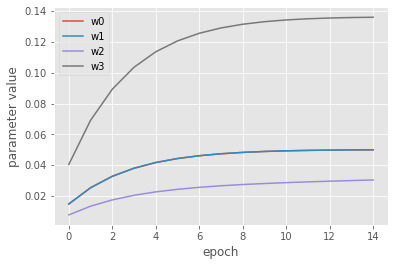

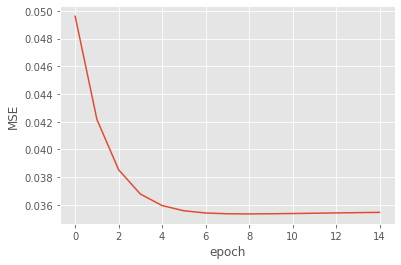

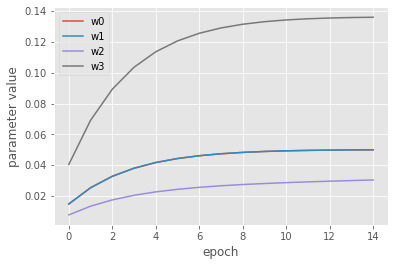

In [89]:
#my code 
combo_list = []
for lr in range (0, len(learning_rate)):
    for reg in range (0, len(regularization)):
        combo_list.append((learning_rate[lr], regularization[reg]))

lowest_mse_scores = []
for i in range(0, len(combo_list)):
    sgd = Regression(combo_list[i][0], combo_list[i][1], n_epochs)
    sgd.fit(X,y, plot = False)
    lowest_mse_scores.append(sgd.lowest_mse)
    
chosen_combo_list = np.argsort(np.array(lowest_mse_scores))[:2]

print('The first best Learning Rate & Regularization are', combo_list[chosen_combo_list[0]])
print('The second best Learning Rate & Regularization are', combo_list[chosen_combo_list[1]])

lowest_mse_scores2 = []
for i in chosen_combo_list:
    sgd = Regression(combo_list[i][0], combo_list[i][1], n_epochs)
    sgd.fit(X, y, plot = True)
    lowest_mse_scores2.append(sgd.lowest_mse)

print('Their MSE scores are', lowest_mse_scores2)